In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle



In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_columns] = df[binary_columns].replace({'yes': 1, 'no': 0})

df['furnishingstatus'] = df['furnishingstatus'].replace({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})

df.head()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9144\2478870010.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_columns] = df[binary_columns].replace({'yes': 1, 'no': 0})
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9144\2478870010.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['furnishingstatus'] = df['furnishingstatus'].replace({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [5]:
#features = ['area', 'bathrooms', 'airconditioning', 'bedrooms', 'stories', 'parking', 'prefarea', 'furnishingstatus']
#based on correlation the above features were selected
df['area_bedrooms'] = df['area'] * df['bedrooms']
df['area_bathrooms'] = df['area'] * df['bathrooms']
df['bed_bath'] = df['bedrooms'] * df['bathrooms']
df['guest_ac'] = df['guestroom'] * df['airconditioning']

# Split the data again
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 
        'airconditioning', 'parking', 'prefarea', 'furnishingstatus', 
        'area_bedrooms', 'area_bathrooms', 'bed_bath', 'guest_ac']]
y = df['price']

In [6]:
X.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,airconditioning,parking,prefarea,furnishingstatus,area_bedrooms,area_bathrooms,bed_bath,guest_ac
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.315596,0.693578,0.234862,0.930275,15514.849541,6835.783486,3.952294,0.080734
std,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.465180,0.861586,0.424302,0.761373,8318.982033,4674.024112,2.255206,0.272676
min,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3450.000000,1650.000000,1.000000,0.000000
25%,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9200.000000,3660.000000,3.000000,0.000000
50%,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13500.000000,5400.000000,3.000000,0.000000
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,19800.000000,8372.000000,6.000000,0.000000
max,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,81000.000000,48600.000000,16.000000,1.000000


In [7]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [8]:
# Train/Validation/Test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)
val_pred = model.predict(X_val)
test_pred = model.predict(X_test)

# Evaluate Linear Regression
val_mse = mean_squared_error(y_val, val_pred)
test_mse = mean_squared_error(y_test, test_pred)
val_r2 = r2_score(y_val, val_pred)
test_r2 = r2_score(y_test, test_pred)

print(f"Linear Regression - Validation MSE: {val_mse}")
print(f"Linear Regression - Validation R2 Score: {val_r2}")
print(f"Linear Regression - Test MSE: {test_mse}")
print(f"Linear Regression - Test R2 Score: {test_r2}")


Linear Regression - Validation MSE: 1528942609122.172
Linear Regression - Validation R2 Score: 0.6673464819729089
Linear Regression - Test MSE: 1747246767133.7004
Linear Regression - Test R2 Score: 0.6236953360782866


In [10]:
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)


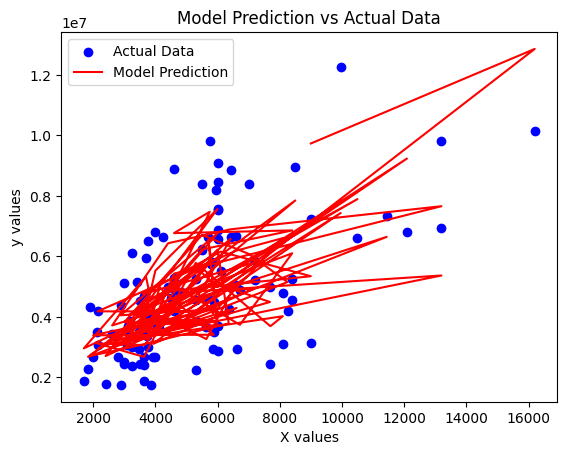

In [14]:

import matplotlib.pyplot as plt


y_pred = model.predict(X_test)

# Plot the dataset and the model's prediction
plt.scatter(X_test['area'], y_test, color='blue', label='Actual Data')
plt.plot(X_test['area'], y_pred, color='red', label='Model Prediction')

# Labels and title
plt.xlabel('X values')
plt.ylabel('y values')
plt.title('Model Prediction vs Actual Data')
plt.legend()
plt.show()
